# Lezione 1

# Q3: Books 

In [1]:
titles = ["don quixote", 
          "in search of lost time", 
          "ulysses", 
          "the odyssey", 
          "war and piece", 
          "moby dick", 
          "the divine comedy", 
          "hamlet", 
          "the adventures of huckleberry finn", 
          "the great gatsby"]

In [2]:
Titles_new = []
for title in titles:
    t_split = title.split()
    Titles = [word.capitalize() for word in t_split]
    title_join = ' '.join(Titles)
    Titles_new.append(title_join)
        
print(Titles_new)        


['Don Quixote', 'In Search Of Lost Time', 'Ulysses', 'The Odyssey', 'War And Piece', 'Moby Dick', 'The Divine Comedy', 'Hamlet', 'The Adventures Of Huckleberry Finn', 'The Great Gatsby']


# Q8 Shopping cart

In [3]:
INVENTORY_TEXT = """
apple, 0.60
banana, 0.20
grapefruit, 0.75
grapes, 1.99
kiwi, 0.50
lemon, 0.20
lime, 0.25
mango, 1.50
papaya, 2.95
pineapple, 3.50
blueberries, 1.99
blackberries, 2.50
peach, 0.50
plum, 0.33
clementine, 0.25
cantaloupe, 3.25
pear, 1.25
quince, 0.45
orange, 0.60
"""

# this will be a global -- convention is all caps
INVENTORY = {}
for line in INVENTORY_TEXT.splitlines():
    if line.strip() == "":
        continue
    item, price = line.split(",")
    INVENTORY[item] = float(price)

INVENTORY

{'apple': 0.6,
 'banana': 0.2,
 'grapefruit': 0.75,
 'grapes': 1.99,
 'kiwi': 0.5,
 'lemon': 0.2,
 'lime': 0.25,
 'mango': 1.5,
 'papaya': 2.95,
 'pineapple': 3.5,
 'blueberries': 1.99,
 'blackberries': 2.5,
 'peach': 0.5,
 'plum': 0.33,
 'clementine': 0.25,
 'cantaloupe': 3.25,
 'pear': 1.25,
 'quince': 0.45,
 'orange': 0.6}

In [4]:
class Item:
    """ an item to buy """
    
    def __init__(self, name, quantity=1):
        """keep track of an item that is in our inventory"""
        if name not in INVENTORY:
            raise ValueError("invalid item name")
        self.name = name
        self.quantity = quantity
        
    def __repr__(self):
        return "{}: {}".format(self.name, self.quantity)
        
    def __eq__(self, other):
        """check if the items have the same name"""
        return self.name == other.name
    
    def __add__(self, other):
        """add two items together if they are the same type"""
        if self.name == other.name:
            return Item(self.name, self.quantity + other.quantity)
        else:
            raise ValueError("names don't match")

In [5]:
banana = Item('banana')
banana2 = Item('banana', 2)
mela = Item('apple')

In [6]:
banana == mela

False

In [7]:
banana+banana

banana: 2

In [8]:
class ShoppingCart:
    
    def __init__(self):
        # the list of items we control
        self.items = []
        
    def subtotal(self):
        """ return a subtotal of our items """        
        subtot = 0
        for item in self.items:
            what = item.name
            how_many = item.quantity
            how_much = INVENTORY[what]
            subtot += how_much*how_many
        return (subtot)

    def add(self, name, quantity):
        """ add an item to our cart -- the an item of the same name already
        exists, then increment the quantity.  Otherwise, add a new item
        to the cart with the desired quantity."""
        
        new_item = Item(name, quantity)
        if new_item in self.items:
            self.items[self.items.index(new_item)]+=new_item
        else: self.items.append(new_item)    
        
        #found = False
        #for check in self.items:
            #if check.name == name:
                #check.quantity += quantity
                #found = True
        #if found == False:
            #self.items.append(Item(name, quantity)) 
        
        return None
        
    def remove(self, name):
        """ remove all of item name from the cart """
        self.items.pop(self.items.index(Item(name)))    
        
        return None
        
    def report(self):
        """ print a summary of the cart """
        for item in self.items:
            print(f"{item.name} : {item.quantity}")

In [9]:
my_shoppingCart = ShoppingCart()

In [10]:
my_shoppingCart.add('banana', 3)

In [11]:
import numpy as np
my_shoppingCart.add('apple', 2)
my_shoppingCart.add('banana', 1)
my_shoppingCart.remove('apple')
my_shoppingCart.report()
tot = my_shoppingCart.subtotal()
print(np.round(tot,2))

banana : 4
0.8


# Lezione 2

## Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

### A.

In [12]:
q = np.arange(1,16).reshape(3,5).T
e = q[2:5:2,:]
q, e

(array([[ 1,  6, 11],
        [ 2,  7, 12],
        [ 3,  8, 13],
        [ 4,  9, 14],
        [ 5, 10, 15]]),
 array([[ 3,  8, 13],
        [ 5, 10, 15]]))

### B.

In [13]:
r = np.ones((4,5), dtype=int)
r[1:-1,1:-1]=0
r

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

def std(a):
    a_mean = np.mean(a)
    S = np.sum((a[:]-a_mean)**2)
    S_N = S/len(a)
    sroot = np.sqrt(S_N)
    return sroot

def std_new(a):
    t0 = time.time()
    return np.sqrt(np.sum((a[:]-np.mean(a))**2)/len(a)), time.time()-t0

In [15]:
A = np.linspace(0,11,1000)

sigma = std(A)
sigma_new, sec = std_new(A)
sigma_new, sec

(3.1786034963256298, 0.0001399517059326172)

In [16]:
t0 = time.time()
#sigma_check = np.std(A)
print(np.std(A), time.time()-t0, time.time()-t0<sec)

3.1786034963256298 0.000293731689453125 False


# Lezione 3

In [17]:
import matplotlib.pyplot as plt
import numpy as np

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

In [18]:
import urllib

In [19]:
url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt'
file = urllib.request.urlopen(url)
data = np.loadtxt(file)

In [20]:
t = data[:,0]  #time
T = data[:,1]  #temperature change
Ts = data[:,2] #smoothed representation of the temperature change

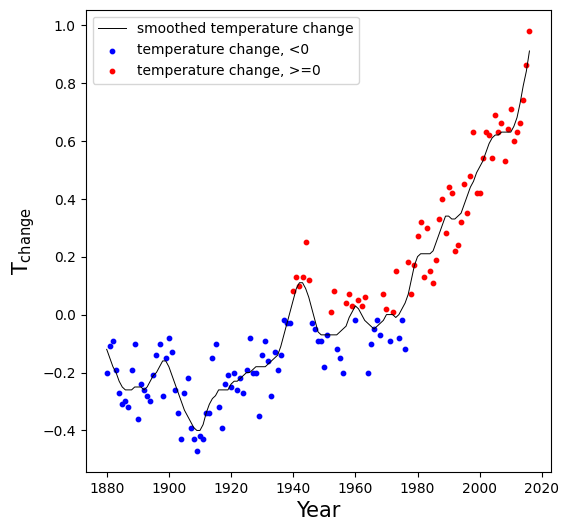

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(t, Ts, 'k', linewidth=0.7, label='smoothed temperature change')
ax.scatter(t[np.where(T<0)], T[np.where(T<0)], c='b', s=10, label='temperature change, <0' )
ax.scatter(t[np.where(T>=0)], T[np.where(T>=0)], c='r', s=10, label='temperature change, >=0' )
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel(r'T$_{\rm{change}}$', fontsize=15)
ax.legend()

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [22]:
def derivative (X, func):
    return np.diff(func)/np.diff(X)

def shift_halfBin (Xprev):
    '''shifts each x value to obtain points in the middle of the previous x bins:
    (since the numerical derivative is indeed computed in the middle of each bin of x)'''
    return Xprev[1:]-(np.diff(Xprev)/2)
    

x = np.linspace(0, 2*np.pi, 100, endpoint=True)
f = np.cos(x) # alternative: f = np.cos(x)*(np.sin(x)+3)
f_prime = derivative(x, f)
x_shift = shift_halfBin(x)
f_sec = derivative(x_shift, f_prime)
x_shift2 = shift_halfBin(x_shift)

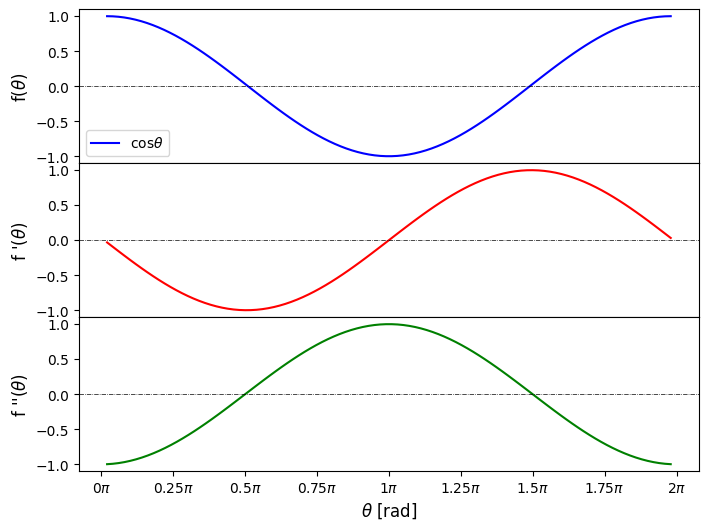

In [23]:
fig = plt.figure(figsize=(8,6))

x_tick = np.arange(0, 2+0.25, 0.25)*np.pi
x_label=[r"$" + format(r/np.pi, ".3g")+ r"\pi$" for r in x_tick]

ax = fig.add_subplot(311)
ax.plot(x, f,'b', label=r'cos$\theta$')
ax.axhline(0,0,1, color='k', linestyle='-.', linewidth=0.5)
ax.set_ylabel(r'f($\theta$)', fontsize=12)
ax.legend()

ax = fig.add_subplot(312)
ax.plot(x_shift, f_prime, 'r')
ax.axhline(0,0,1, color='k', linestyle='-.', linewidth=0.5)
ax.set_ylabel(r"f '($\theta$)", fontsize=12)

ax = fig.add_subplot(313)
ax.plot(x_shift2, f_sec, 'g')
ax.axhline(0,0,1, color='k', linestyle='-.', linewidth=0.5)
ax.set_xlabel(r'$\theta$ [rad]', fontsize=12)
ax.set_ylabel(r"f ''($\theta$)", fontsize=12)
ax.set_xticks(x_tick)
ax.set_xticklabels(x_label, fontsize=10)


plt.subplots_adjust(hspace=0)


# Lezione 4

## Q7: Noisy signal

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import integrate

In [25]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

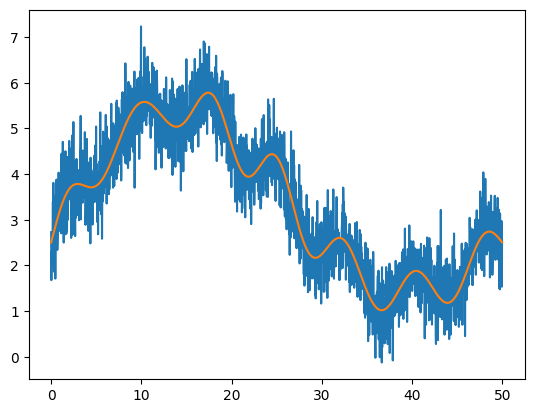

In [26]:
plt.plot(x, noisy)
plt.plot(x, orig)

In [27]:
sigma = 35

gauss = signal.gaussian(N, sigma)

Sum = sum(gauss)
gauss_norm = gauss/Sum

convol = signal.convolve(noisy, gauss_norm, mode='same')

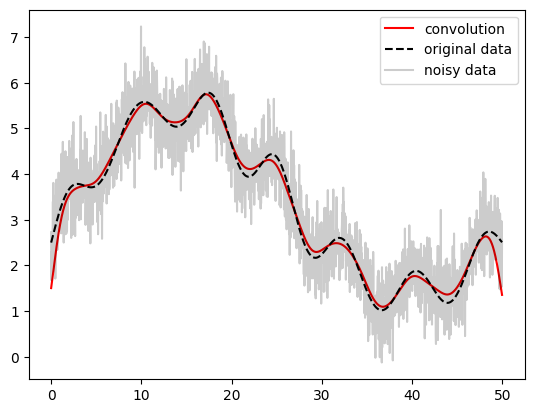

In [28]:
plt.plot(x,convol, 'r', label='convolution')
plt.plot(x,orig, 'k', linestyle='--', label='original data')
plt.plot(x, noisy, 'k', alpha=0.2, label='noisy data')
plt.legend()

## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  

Then do the same cubic splines (look at `CubicSpline`)

Plot the resulting interpolant.

In [29]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

# true function
def f(x):
    return x**(1/3)+np.sin(x/3)*np.cos(x/4)+np.sin(x/4)

x_fine = np.linspace(1,100,5000)
y_fine = f(x_fine)

# x data (two different sets)
x_FirstSet = np.linspace(1,100,25,endpoint=True)
x_SecondSet = np.logspace(0,2,50)

err linear = 13.18; 
err quadratic =7.95; 
err cubic spline = 6.06


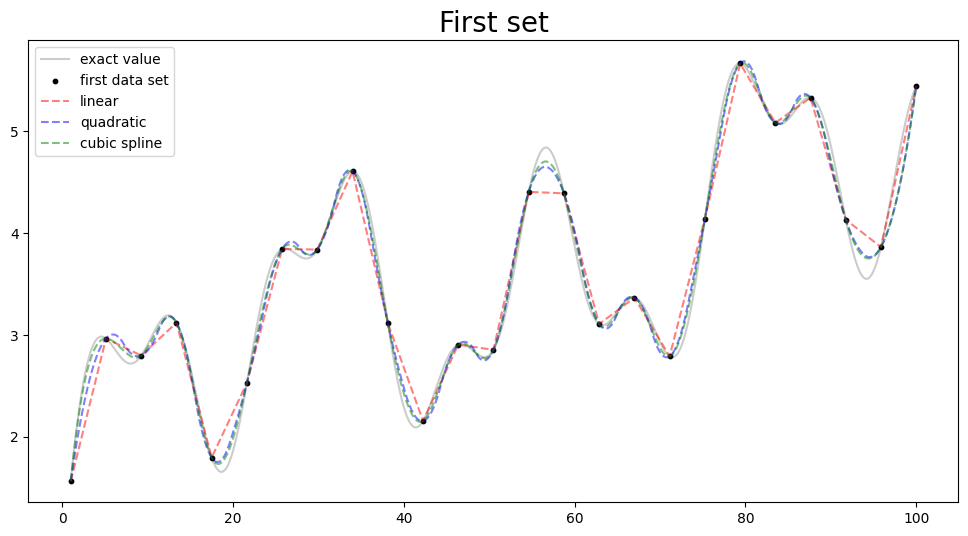

In [30]:
# interpolation of first set with 3 different methods

interp_lin = interpolate.interp1d(x_FirstSet,f(x_FirstSet),'linear')
interp_quad = interpolate.interp1d(x_FirstSet,f(x_FirstSet),'quadratic')
interp_cubS = interpolate.CubicSpline(x_FirstSet,f(x_FirstSet))
                                
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)
plt.plot(x_fine,y_fine, 'k', alpha=0.2, label='exact value')
plt.scatter(x_FirstSet,f(x_FirstSet), c='k', s=10, label='first data set')
plt.plot(x_fine,interp_lin(x_fine), c='r', linestyle='--', alpha=0.5, label='linear')
plt.plot(x_fine,interp_quad(x_fine), c='b', linestyle='--', alpha=0.5, label='quadratic')
plt.plot(x_fine,interp_cubS(x_fine), c='g', linestyle='--', alpha=0.5, label='cubic spline')
plt.legend()
plt.title('First set', fontsize=20)

err_lin = np.sqrt(np.sum((y_fine-interp_lin(x_fine))**2))
err_quad = np.sqrt(np.sum((y_fine-interp_quad(x_fine))**2))
err_cubS = np.sqrt(np.sum((y_fine-interp_cubS(x_fine))**2))

print(f'err linear = {err_lin.round(2)}; \nerr quadratic ={err_quad.round(2)}; \nerr cubic spline = {err_cubS.round(2)}')

err linear = 27.11; 
err quadratic =22.88; 
err cubic spline = 21.06


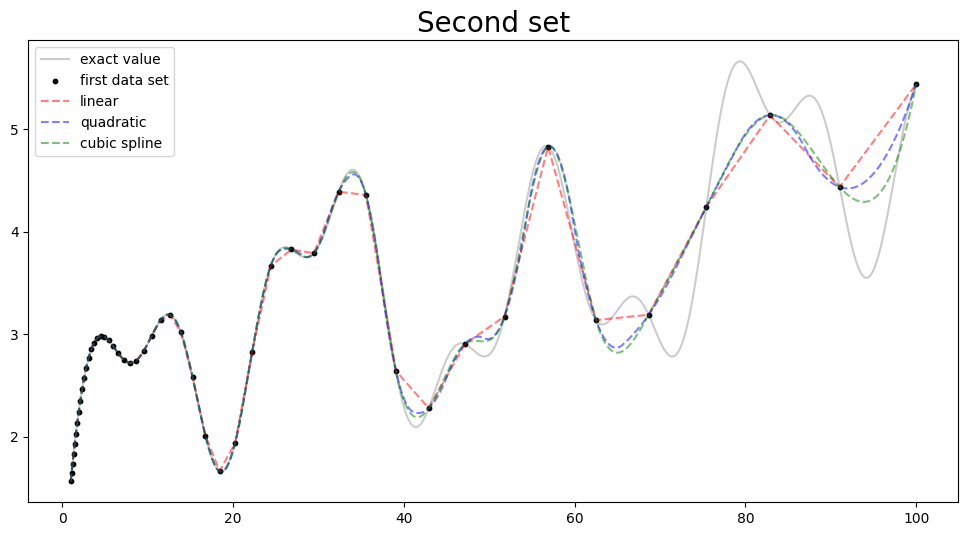

In [31]:
# interpolation of second set with 3 different methods

interp_lin = interpolate.interp1d(x_SecondSet,f(x_SecondSet),'linear')
interp_quad = interpolate.interp1d(x_SecondSet,f(x_SecondSet),'quadratic')
interp_cubS = interpolate.CubicSpline(x_SecondSet,f(x_SecondSet))
                                  
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(111)
plt.plot(x_fine,y_fine, 'k', alpha=0.2, label='exact value')
plt.scatter(x_SecondSet,f(x_SecondSet), c='k', s=10, label='first data set')
plt.plot(x_fine,interp_lin(x_fine), c='r', linestyle='--', alpha=0.5, label='linear')
plt.plot(x_fine,interp_quad(x_fine), c='b', linestyle='--', alpha=0.5, label='quadratic')
plt.plot(x_fine,interp_cubS(x_fine), c='g', linestyle='--', alpha=0.5, label='cubic spline')
plt.legend()
plt.title('Second set', fontsize=20)

err_lin = np.sqrt(np.sum((y_fine-interp_lin(x_fine))**2))
err_quad = np.sqrt(np.sum((y_fine-interp_quad(x_fine))**2))
err_cubS = np.sqrt(np.sum((y_fine-interp_cubS(x_fine))**2))

print(f'err linear = {err_lin.round(2)}; \nerr quadratic ={err_quad.round(2)}; \nerr cubic spline = {err_cubS.round(2)}')


# Lezione 6

## Q1: Your next research project.
Pick the directory of your current research project (your next paper!) and put it under version control.\

\
I've put my second phd project under version control. https://github.com/ffastidio/Phd_SecondProject (private repository)



## Q2: Egocentric

Write a github action that lets you commit only if README.md contains your name.



https://github.com/ffastidio/Egocentric

# Lezione 7

## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


In [32]:
import numpy as np
from numba import njit

def MC_market(state, steps=1e7):

    bull = 0
    bear = 0
    stagnant = 0

    for i in range(int(steps)):

        step = np.random.uniform(0,1)

        if state=='Bull':
            if step <= 0.9:
                state = 'Bull'
                bull+=1
            elif (step > 0.9 and step<=(0.9+0.075)):
                state = 'Bear'
                bear+=1
            else: 
                state = 'Stagnant'
                stagnant+=1

        elif state=='Bear':
            if step <= 0.8:
                state = 'Bear'
                bear+=1
            elif (step > 0.8 and step<=(0.8+0.15)):
                state = 'Bull'
                bull+=1
            else: 
                state = 'Stagnant'
                stagnant+=1

        else: 
            if step <= 0.5:
                state = 'Stagnant'
                stagnant+=1
            elif (step > 0.5 and step<=(0.5+0.25)):
                state = 'Bull'
                bull+=1
            else: 
                state = 'Bear'
                bear+=1

    return(bull/steps, bear/steps, stagnant/steps)

In [33]:
c_MC_market = njit(MC_market)

### using MC_market

In [34]:
iterations = 5

bull_percentage = []
bear_percentage = []
stagnant_percentage = []

for j in range(iterations):
        
    res = input('What state do you want to start from? [Bull/Bear/Stagnant]')
    
    State = res
    
    percentages = MC_market(State)
    
    bull_percentage.append(percentages[0]*100)
    bear_percentage.append(percentages[1]*100)
    stagnant_percentage.append(percentages[2]*100)
    
print('\n'
      'percentage of Bull states for each iteration: \n', 
      np.array(bull_percentage).round(2), '\n\n'
      'percentage of Bear states for each iteration: \n', 
      np.array(bear_percentage).round(2), '\n\n'
      'percentage of Stagnant states for each iteration: \n',
      np.array(stagnant_percentage).round(2))


What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Bear
What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Stagnant

percentage of Bull states for each iteration: 
 [62.5  62.52 62.5  62.55 62.5 ] 

percentage of Bear states for each iteration: 
 [31.25 31.24 31.26 31.21 31.26] 

percentage of Stagnant states for each iteration: 
 [6.25 6.25 6.24 6.25 6.24]


### using c_MC_market

In [35]:
iterations = 5

bull_percentage = []
bear_percentage = []
stagnant_percentage = []

for j in range(iterations):
        
    res = input('What state do you want to start from? [Bull/Bear/Stagnant]')
    
    State = res
    
    percentages = c_MC_market(State)
    
    bull_percentage.append(percentages[0]*100)
    bear_percentage.append(percentages[1]*100)
    stagnant_percentage.append(percentages[2]*100)
    
print('\n'
      'percentage of Bull states for each iteration: \n', 
      np.array(bull_percentage).round(2), '\n\n'
      'percentage of Bear states for each iteration: \n', 
      np.array(bear_percentage).round(2), '\n\n'
      'percentage of Stagnant states for each iteration: \n',
      np.array(stagnant_percentage).round(2))


What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Bear
What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Bull
What state do you want to start from? [Bull/Bear/Stagnant]Stagnant

percentage of Bull states for each iteration: 
 [62.45 62.49 62.49 62.48 62.52] 

percentage of Bear states for each iteration: 
 [31.28 31.26 31.26 31.27 31.24] 

percentage of Stagnant states for each iteration: 
 [6.26 6.25 6.25 6.25 6.24]


In [36]:
State = 'Bull'
%timeit MC_market(State)

12.7 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
State = 'Bull'
%timeit c_MC_market(State)

82.1 ms ± 600 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifill, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

In [38]:
def plot(func):

    def wrapper(*args):
        
        import matplotlib.pyplot as plt
        import matplotlib
        from matplotlib import rc    # https://matplotlib.org/stable/users/explain/customizing.html
        
        # setting figure properties
        
        lines = {'linewidth' : 2,
                 'linestyle' : '--',
                 'color' : 'k',
                 'marker' : None,
                 'markerfacecolor' : 'auto',
                 'markeredgecolor' : 'auto',
                 'markersize' : 5}
        
        font = {'family' : 'monospace',
                'weight' : 'medium',
                'size'   : 20}
        
        axes = {'grid' : 'False',
                'grid.axis' : 'both',
                'grid.which' : 'major',
                'titlelocation' : 'center',
                'titlesize' : 'large',
                'labelsize' : 'large'}
        
        xtick = {'top' : 'False',
                 'bottom' : 'True',
                 'major.size' : 6.5,
                 'minor.size' : 5,
                 'major.width' : 1,
                 'minor.width' : 0.6,
                 'labelsize' : 'large',
                 'direction' : 'inout',
                 'minor.visible' : 'True'}
        
        ytick = {'right' : 'False',
                 'left' : 'True',
                 'major.size' : 6.5,
                 'minor.size' : 5,
                 'major.width' : 1,
                 'minor.width' : 0.6,
                 'labelsize' : 'large',
                 'direction' : 'inout',
                 'minor.visible' : 'True'}
        
        legend = {'loc' : 'best',
                  'markerscale' : 1.0,
                  'fontsize' : 'large'}
        
        figure = {'titlesize' : 'large'}
        image = {'aspect' : 'equal'} # or auto
                
        rc('lines', **lines) # pass in the font dict as kwargs
        rc('font', **font)  
        rc('axes', **axes)        
        rc('xtick', **xtick) 
        rc('ytick', **ytick)
        rc('legend', **legend)
        rc('figure', **figure)
        rc('image', **image)
        
        matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
        
        # genetate figure (calling function)
        Fig = func(*args) 
        
        # save figure as pdf
        Fig.savefig(func.__name__+'.pdf', bbox_inches='tight')
        Fig.clf()
        
    return wrapper

In [39]:
@plot
def TestPlot_L7ex2(x,y):
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(6,6))
    ax=fig.add_axes([0,0,1,1])
    ax.plot(x,y, label=r'$f_{\rm{Test}}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Test Function')
    ax.legend()
    return fig

In [40]:
import numpy as np
X = np.linspace(1,10,100)
Y = np.sin(X)

In [41]:
TestPlot_L7ex2(X,Y)

/tmp/ipykernel_23871/2619289369.py:57: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  rc('lines', **lines) # pass in the font dict as kwargs


<Figure size 600x600 with 0 Axes>

# Lezione 8

## Q1: I love pip

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

I have taken the code written for exercise 2, Lecture 7

In [42]:
import moduleL8ex1 as ml8

In [43]:
import sys
sys.path

['/home/ff00267/Documents/DOTTORATO/GEROSA_ComputingWithPython/scientificcomputing_bicocca_2023-main/working/exercises',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ff00267/.local/lib/python3.8/site-packages',
 '/home/ff00267/.local/lib/python3.8/site-packages/agama-1.0-py3.8-linux-x86_64.egg',
 '/home/ff00267/.local/lib/python3.8/site-packages/moduleL8ex1-0.0.3-py3.8.egg',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages']

In [44]:
print(ml8.__file__)

/home/ff00267/.local/lib/python3.8/site-packages/moduleL8ex1-0.0.3-py3.8.egg/moduleL8ex1/__init__.py


In [45]:
import numpy as np

x = np.linspace(0,10,100)
y = np.sin(x)

ml8.TestPlot_L7ex2(x,y)


<Figure size 600x600 with 0 Axes>

To install it from pip try:\
pip install -i https://test.pypi.org/simple/ moduleL8ex1

## Q3: how do professionals do it?

I have looked through the scipy gitHub repository, reading some of their workflows and testing functions.